# Reference Solution for Coding Assignment "ML Basics"

## 1. Preparation

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## 2. Data

### 2.1 Dataset

In [2]:
# Import the weather measurements.
data = pd.read_csv('Assignment_MLBasicsData.csv')

# We consider each temperature measurement (=a row in dataframe data) 
# as a separate data point.
# Determine the total number of data points stored in csv file.
nrdatapoints = len(data)

# Print out the first data point (first row).
print("First data point:")
print(data.iloc[0])
print("\n******************************\n")

# Here is another data point. 
print("Another data point:")
print(data.iloc[13])
print("\n******************************\n")

# We use normalized values of 
# latitude, longitude, year, mon, day, hour, minute (as float values) 
# as features of a data point.
nrfeatures = 7 

# The code snippet below extracts the features of the first data point (first row in dataframe data).
date_object = datetime.strptime(data['Timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S')

# Extract individual components.
latitude = data["Latitude"].iloc[0]
longitude = data["Longitude"].iloc[0]
year = float(date_object.year)
month = float(date_object.month)
day = float(date_object.day)
hour = float(date_object.hour)
minute = float(date_object.minute)

print("Unnormalized features of the first data point: ")
print(f"Latitude: {latitude}")
print(f"Longitude: {longitude}")
print(f"Year: {year}")
print(f"Month: {month}")
print(f"Day: {day}")
print(f"Hour: {hour}")
print(f"Minute: {minute}")
print("\n******************************\n")

print("Normalized features of the first data point: ")
print(f"Latitude: {latitude/100}")
print(f"Longitude: {longitude/100}")
print(f"Year: {year/2025}")
print(f"Month: {month/13}")
print(f"Day: {day/32}")
print(f"Hour: {hour/25}")
print(f"Minute: {minute/61}")
print("\n******************************\n")

# We choose the temperature as the label (quantity of interest) of a data point.
print("Label of the first data point:", data["temp"].iloc[0])

First data point:
Unnamed: 0                              0
Latitude                         69.04277
Longitude                        20.85091
Timestamp             2023-12-31 18:00:00
temp                                -16.5
name          Enontekiö Kilpisjärvi Saana
Name: 0, dtype: object

******************************

Another data point:
Unnamed: 0                        13
Latitude                      69.757
Longitude                     27.012
Timestamp        2023-12-31 13:00:00
temp                           -26.3
name          Utsjoki Kevo Kevojärvi
Name: 13, dtype: object

******************************

Unnormalized features of the first data point: 
Latitude: 69.04277
Longitude: 20.85091
Year: 2023.0
Month: 12.0
Day: 31.0
Hour: 18.0
Minute: 0.0

******************************

Normalized features of the first data point: 
Latitude: 0.6904277000000001
Longitude: 0.2085091
Year: 0.9990123456790123
Month: 0.9230769230769231
Day: 0.96875
Hour: 0.72
Minute: 0.0

*************

### 2.2 Features and labels

In [3]:
# We next build the feature matrix X (each of its rows hold the features of a data point) 
# and the label vector y (whose entries hold the labels of data points).
X = np.zeros((nrdatapoints, nrfeatures))
y = np.zeros((nrdatapoints, 1))

# Iterate over all rows in dataframe and create corresponding feature vector and label. 
for ind in data.index:
    # Latitude of FMI station, normalized by 100. 
    lat = float(data['Latitude'].iloc[ind]) / 100
    
    # Longitude of FMI station, normalized by 100.
    lon = float(data['Longitude'].iloc[ind]) / 100
    
    # Exctract the temperature value.
    tmp = data['temp'].iloc[ind]
    
    # Read the date and time of the temperature measurement.
    date_object = datetime.strptime(data['Timestamp'].iloc[ind], '%Y-%m-%d %H:%M:%S')

    # Extract year, month, day, hour, minute, and second. 
    # Normalize these values to ensure features are in range [0,1].
    year = float(date_object.year) / 2025
    month = float(date_object.month) / 13
    day = float(date_object.day) / 32
    hour = float(date_object.hour) / 25
    minute = float(date_object.minute) / 61
    
    # Store the data point's features and a label.
    X[ind,:] = [lat, lon, year, month, day, hour, minute]
    y[ind,:] = tmp

print(f"The created feature matrix contains {np.shape(X)[0]} entries of {np.shape(X)[1]} features each.")
print(f"The created label vector contains {np.shape(y)[0]} measurements.")

The created feature matrix contains 16469 entries of 7 features each.
The created label vector contains 16469 measurements.


### 2.3 Training and validation sets

In [4]:
# Define the number of data points used for training set.
trainsize = 100

# Split the dataset into training and validation set. 
Xtrain = X[:trainsize,:] 
Xval = X[trainsize:] 
ytrain = y[:trainsize] 
yval = y[trainsize:] 

print(f"The training set consists of {np.shape(Xtrain)[0]} data points.")
print(f"The validation set consists of {np.shape(Xval)[0]} data points.")

The training set consists of 100 data points.
The validation set consists of 16369 data points.


## 3. Model

### 3.1 Student task #1 - Linear regression

In [5]:
# We next train and validate a Linear Regression model. 
linmodel = LinearRegression()

# Train the linear model, i.e., solve the ERM to obtain parameters 
# of the linear model.
linmodel.fit(Xtrain, ytrain)
Etrain = mean_squared_error(ytrain, linmodel.predict(Xtrain))
Eval = mean_squared_error(yval, linmodel.predict(Xval))

print("\n*************** Linear Regression Diagnosis ***************")
print("Training error:", Etrain)
print("Validation error:", Eval)


*************** Linear Regression Diagnosis ***************
Training error: 17.082721273955848
Validation error: 18.091205182333834


### 3.2 Student task #2 - Polynomial features

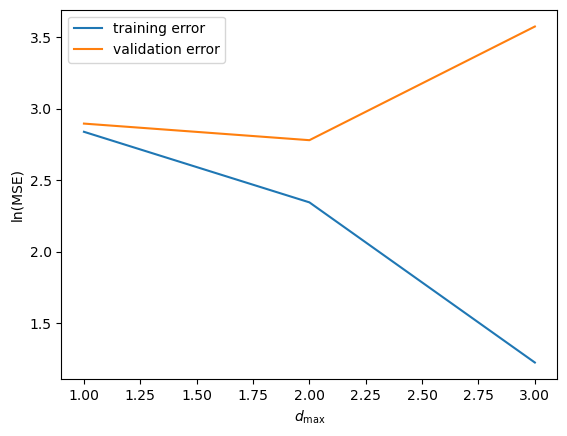

In [7]:
# Define the polynomial degrees.
maxdegreevals = [1, 2, 3]

# Initialize the arrays to store training and validation errors.
trainerr = np.zeros((len(maxdegreevals),1))
valerr = np.zeros((len(maxdegreevals),1))

for i, degree in enumerate(maxdegreevals): 
    poly = PolynomialFeatures(degree)
    Xnew = poly.fit_transform(X)
    Xtrain = Xnew[0:trainsize,:] 
    Xval = Xnew[trainsize:] 
    ytrain = y[0:trainsize] 
    yval = y[trainsize:] 
    linmodel.fit(Xtrain, ytrain)
    trainerr[i] = np.log(mean_squared_error(ytrain, linmodel.predict(Xtrain)))
    valerr[i] = np.log(mean_squared_error(yval, linmodel.predict(Xval)))
    
# Plot the training and validation errors.
plt.plot(maxdegreevals, np.hstack([trainerr, valerr]))
plt.legend(["training error","validation error"])
plt.xlabel(r'$d_{\rm max}$')
plt.ylabel('ln(MSE)')
plt.show()

### 3.3 Student task #3 - Ridge regression

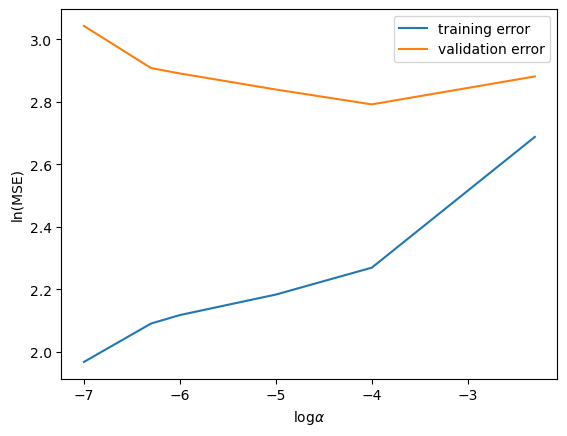

In [8]:
# Values for the GTVMin parameter alpha.
GTVmin_parameter = np.array([1e-9, 5e-9, 1e-8, 1e-7,1e-6,5e-5]) 
# The input paramter 'alpha' for RidgeRegression class requires a scaling by the samplesize.
alphavals = GTVmin_parameter * trainsize
# The maximal degree of polynomial combinations of original features used to create more features.
poly_degree = 3

poly = PolynomialFeatures(poly_degree)
X_poly = poly.fit_transform(X)

Xtrain_poly = X_poly[:trainsize,:] 
Xval_poly = X_poly[trainsize:] 
ytrain = y[:trainsize] 
yval = y[trainsize:] 

trainerr = np.zeros((len(alphavals), 1))
valerr = np.zeros((len(alphavals), 1))

for i, alpha in enumerate(alphavals): 
    ridgeest = Ridge(alpha=alpha)
    ridgeest.fit(Xtrain_poly,ytrain)
    trainerr[i] = np.log(mean_squared_error(ytrain, ridgeest.predict(Xtrain_poly)))
    valerr[i] = np.log(mean_squared_error(yval, ridgeest.predict(Xval_poly)))
    
# Plot the training and validation errors.
plt.plot(np.log10(alphavals), trainerr)
plt.plot(np.log10(alphavals), valerr)
plt.legend(['training error', 'validation error'])
plt.xlabel(r'${\rm log} \alpha$')
plt.ylabel('ln(MSE)')
plt.show()